<a href="https://colab.research.google.com/github/imabhinav-singh/CS360/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression (one feature) 
  via Ordinary Least Square Method

*** No CODEPAGE record, no encoding_override: will use 'ascii'


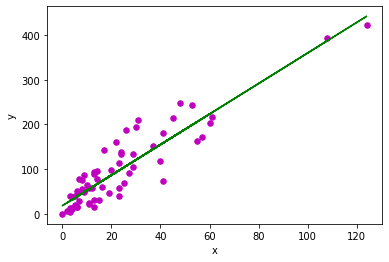

MAE for training set: 29.748464938891495
MAE for test set: 24.434456342162736
MAE for validation set: 28.97172818523063


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  

def estimate_coef(x, y):
  n = np.size(x)
  m_x, m_y = np.mean(x), np.mean(y)
  cov_xy = np.sum(x*y) - n*m_x*m_y
  var_x = np.sum(x*x) - n*m_x*m_x
  b_1 = cov_xy / var_x
  b_0 = m_y - b_1*m_x
  return (b_0, b_1)

def plot_regression_line(x, y, b): 
  plt.scatter(x, y, color = "m", marker = "o", s = 30) 
  y_pred = b[0] + b[1]*x 
  plt.plot(x, y_pred, color = "g") 
  plt.xlabel('x') 
  plt.ylabel('y') 
  plt.show() 

def calc_MAE(x, y, b):
  y_pred = b[0] + b[1]*x 
  error = np.abs(y - y_pred)
  return np.mean(error)


dataset = pd.read_excel('slr06.xls',header=0)

X = dataset['X'].values
Y = dataset['Y'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

b = estimate_coef(x_train, y_train)
plot_regression_line(X, Y, b)

print("MAE for training set: "+str(calc_MAE(x_train, y_train, b)))
print("MAE for test set: "+str(calc_MAE(x_test, y_test, b)))
print("MAE for validation set: "+str(calc_MAE(x_valid, y_valid, b)))

#Simple Linear Regression (one feature) 
  via Gradient Descent Method

*** No CODEPAGE record, no encoding_override: will use 'ascii'


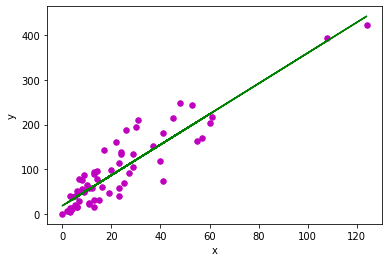

MAE for training set: 29.734557694588364
MAE for test set: 24.457669681528195
MAE for validation set: 28.99694102609038


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  

def estimate_coef(x, y, learning_rate=0.0001, b_0=0, b_1=1):
  iterations = 100000

  for i in range(iterations):
    temp_b0, temp_b1 = b_0, b_1
    b_0 = b_0 - learning_rate*np.mean(temp_b0 + temp_b1*x - y)
    b_1 = b_1 - learning_rate*np.mean((temp_b0 + temp_b1*x - y)*x)
    if cost(x, y, (b_0, b_1)) <= 0.0000001: 
      break

  return (b_0, b_1)

def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "m", marker = "o", s = 30) 
    y_pred = b[0] + b[1]*x 
    plt.plot(x, y_pred, color = "g") 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show() 

def calc_MAE(x, y, b):
  y_pred = b[0] + b[1]*x 
  error = np.abs(y - y_pred)
  return np.mean(error)

def cost(x, y, b):
  n = np.size(x)
  y_pred = b[0] + b[1]*x 
  error = (y_pred - y)*(y_pred - y)
  return np.mean(error)/2


dataset = pd.read_excel('slr06.xls',header=0)

X = dataset['X'].values
Y = dataset['Y'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

b = estimate_coef(x_train, y_train)
plot_regression_line(X, Y, b)

print("MAE for training set: "+str(calc_MAE(x_train, y_train, b)))
print("MAE for test set: "+str(calc_MAE(x_test, y_test, b)))
print("MAE for validation set: "+str(calc_MAE(x_valid, y_valid, b)))

#Multiple Linear Regression
  via gradient Descent Method

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  

def estimate_coef(x, y, k, learning_rate=0.0001, random=False):
  iterations = 1000
  
  b = np.zeros(k, dtype=int)
  if random:
    b = np.random.rand(k)
    
  for i in range(iterations):
    temp_b = b
    for j in range(k):
      b[j] = b[j] - learning_rate*np.mean((np.sum(x*temp_b, axis=1) - y)*x[:, j])

  return b

def calc_MAE(x, y, b):
  y_pred = np.sum(x*b, axis=1)
  error = np.abs(y - y_pred)
  return np.mean(error)


boston = datasets.load_boston(return_X_y=False)
k = np.size(boston['feature_names']) + 1
X, Y = boston['data'], boston['target']
X = np.column_stack(([1 for i in range(X.shape[0])], X))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

b = estimate_coef(x_train, y_train, k)

print("MAE for training set: "+str(calc_MAE(x_train, y_train, b)))
print("MAE for test set: "+str(calc_MAE(x_test, y_test, b)))
print("MAE for validation set: "+str(calc_MAE(x_valid, y_valid, b)))


MAE for training set: 22.74653465346535
MAE for test set: 22.47029702970297
MAE for validation set: 21.95980392156863
